In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import datetime
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.patches as mpatches


In [42]:
df_validation = pd.read_csv(r'../../data/tidy/energy_validation_april2022.csv', delimiter=',', skiprows=0, low_memory=False)

In [4]:
df_model = pd.read_csv(r'../../results/computed-fuel-rates.csv', delimiter=',', skiprows=0, low_memory=False)

In [5]:
df_model_CDB = df_model[df_model.Powertrain == 'conventional'].copy()

In [6]:
df_model_HEB = df_model[df_model.Powertrain == 'hybrid'].copy()

In [7]:
df_model_BEB = df_model[df_model.Powertrain == 'electric'].copy()

In [8]:
df_daily_energy_model_CDB = df_model_CDB.groupby(['Date']).agg({'Energy':'sum'})[['Energy']].reset_index()

In [9]:
df_daily_energy_model_HEB = df_model_HEB.groupby(['Date']).agg({'Energy':'sum'})[['Energy']].reset_index()

In [10]:
df_daily_energy_model_BEB = df_model_BEB.groupby(['Date']).agg({'Energy':'sum'})[['Energy']].reset_index()

In [11]:
df_validation = pd.read_csv(r'../../data/tidy/energy_validation_april2022.csv', delimiter=',', skiprows=0, low_memory=False)

In [12]:
df_validation_CDB = df_validation[df_validation.Powertrain == 'conventional'].copy()

In [13]:
df_validation_HEB = df_validation[df_validation.Powertrain == 'hybrid'].copy()

In [14]:
df_validation_BEB = df_validation[df_validation.Powertrain == 'electric'].copy()

In [15]:
df_validation_CDB = df_validation_CDB.groupby('date').agg({'gallons':'sum'})[['gallons']].reset_index()

In [16]:
df_validation_HEB = df_validation_HEB.groupby('date').agg({'gallons':'sum'})[['gallons']].reset_index()

In [17]:
df_validation_BEB = df_validation_BEB.groupby('date').agg({'gallons':'sum'})[['gallons']].reset_index()

In [18]:
df_validation_diesel = df_validation.groupby('date').agg({'gallons':'sum'})[['gallons']].reset_index()

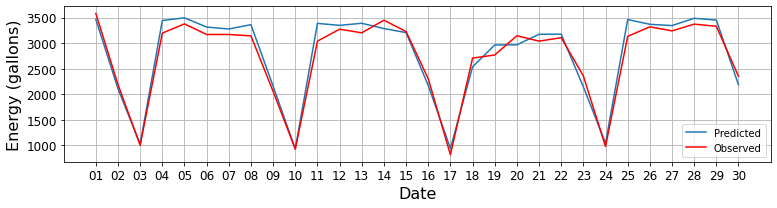

In [19]:
# Plot time series
#figure(figsize=(12, 8), dpi=400)
fig, ax = plt.subplots(figsize=(11, 3))

fig=plt.plot(df_daily_energy_model_CDB.Date, df_daily_energy_model_CDB.Energy, label='Predicted')
fig=plt.plot(df_validation_CDB.date, df_validation_CDB.gallons, label='Observed', color='red')

# Add title and labels

plt.xlabel('Date', fontsize=16)
plt.ylabel('Energy (gallons)', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend

plt.legend()

# Auto space

plt.tight_layout()

# Set major formatter
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

plt.grid()

plt.savefig(r'../../figures/timeseries-energy-CDB.png', dpi=400, bbox_inches='tight')

# Display plot

plt.show() 

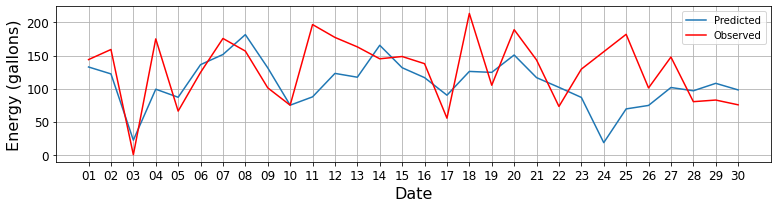

In [20]:
# Plot time series
#figure(figsize=(12, 8), dpi=400)
fig, ax = plt.subplots(figsize=(11, 3))

fig=plt.plot(df_daily_energy_model_HEB.Date, df_daily_energy_model_HEB.Energy, label='Predicted')
fig=plt.plot(df_validation_HEB.date, df_validation_HEB.gallons, label='Observed', color='red')

# Add title and labels

plt.xlabel('Date', fontsize=16)
plt.ylabel('Energy (gallons)', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend

plt.legend()

# Auto space

plt.tight_layout()


plt.grid()

# Set major formatter
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

plt.savefig(r'../../figures/timeseries-energy-HEB.png', dpi=400, bbox_inches='tight')

# Display plot

plt.show() 

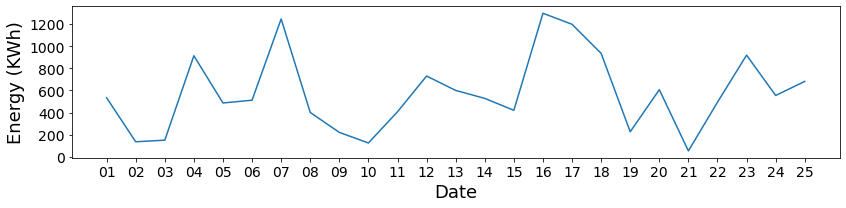

In [21]:
# Plot time series
#figure(figsize=(12, 8), dpi=400)
fig, ax = plt.subplots(figsize=(12, 3))

fig=plt.plot(df_daily_energy_model_BEB.Date, df_daily_energy_model_BEB.Energy, label='Model')
#fig=plt.plot(df_validation_BEB.date, df_validation_BEB.gallons, label='Actual', color='red', linewidth=3)

# Add title and labels

plt.xlabel('Date', fontsize=18)
plt.ylabel('Energy (KWh)', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add legend

#plt.legend()

# Auto space

plt.tight_layout()

# Set major formatter
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

plt.savefig(r'../../figures/timeseries-energy-BEB.png', dpi=400, bbox_inches='tight')

# Display plot

plt.show() 

In [22]:
df_model_CDB.nlargest(5, 'Energy')

,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,ServiceDateTime,Unnamed: 0,DateKey,CalendarDate,Year,...,acc,Powertrain,VehicleModel,Vehicle_mass,elevation,grade,Power(KW),FuelRate(L/s),Energy,FuelRate/Energy
1239908,1239908,1239908,1239908,1239908,1239908,2022-04-16 22:22:13,734460,8775,2022-04-16 00:00:00.000,2022,...,-0.000029,conventional,0,26900.0,97.0,0.022551,0.075902,0.001865,36.251356,NaN
1148306,1148306,1148306,1148306,1148306,1148306,2022-04-18 19:28:03,795469,8777,2022-04-18 00:00:00.000,2022,...,-0.000078,conventional,0,26900.0,50.0,-0.034290,-0.019043,0.001858,33.270550,NaN
1171769,1171769,1171769,1171769,1171769,1171769,2022-04-20 18:51:56,898015,8779,2022-04-20 00:00:00.000,2022,...,0.000000,conventional,0,26900.0,82.0,0.000000,0.000000,0.001858,32.203481,NaN
1360556,1360556,1360556,1360556,1360556,1360556,2022-04-28 19:23:58,1214984,8787,2022-04-28 00:00:00.000,2022,...,-0.000101,conventional,0,26900.0,45.0,-0.020854,-0.030211,0.001858,31.546748,NaN
1179445,1179445,1179445,1179445,1179445,1179445,2022-04-15 18:41:54,694124,8774,2022-04-15 00:00:00.000,2022,...,-0.000031,conventional,0,26900.0,94.0,0.022355,0.082518,0.001865,30.550371,NaN


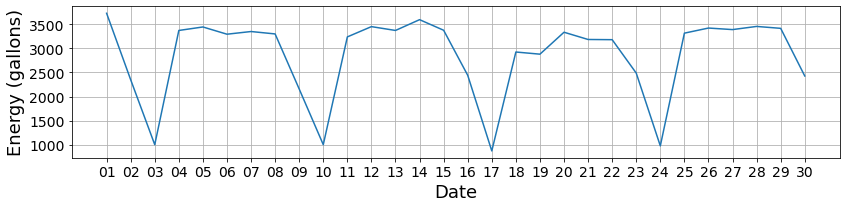

In [23]:
# Plot time series
#figure(figsize=(12, 8), dpi=400)
fig, ax = plt.subplots(figsize=(12, 3))

fig=plt.plot(df_validation_diesel.date, df_validation_diesel.gallons)
# Add title and labels

plt.xlabel('Date', fontsize=18)
plt.ylabel('Energy (gallons)', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add legend

plt.grid()

# Auto space

plt.tight_layout()

# Set major formatter
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

plt.savefig(r'../../figures/fuel-consumption.png', dpi=400, bbox_inches='tight')

# Display plot

plt.show() 

In [46]:
df_diesel = df_validation[df_validation['Powertrain'] != 'electric'].copy()

In [25]:
df_validation_diesel = df_diesel.groupby(['date','equipment_id']).agg({'gallons':'sum'})[['gallons']].reset_index()

In [26]:
df_validation_diesel['date']= pd.to_datetime(df_validation_diesel['date'])

In [27]:
df_validation_diesel=df_validation_diesel.set_index('date')

In [28]:
vehicles=df_validation_diesel['equipment_id']

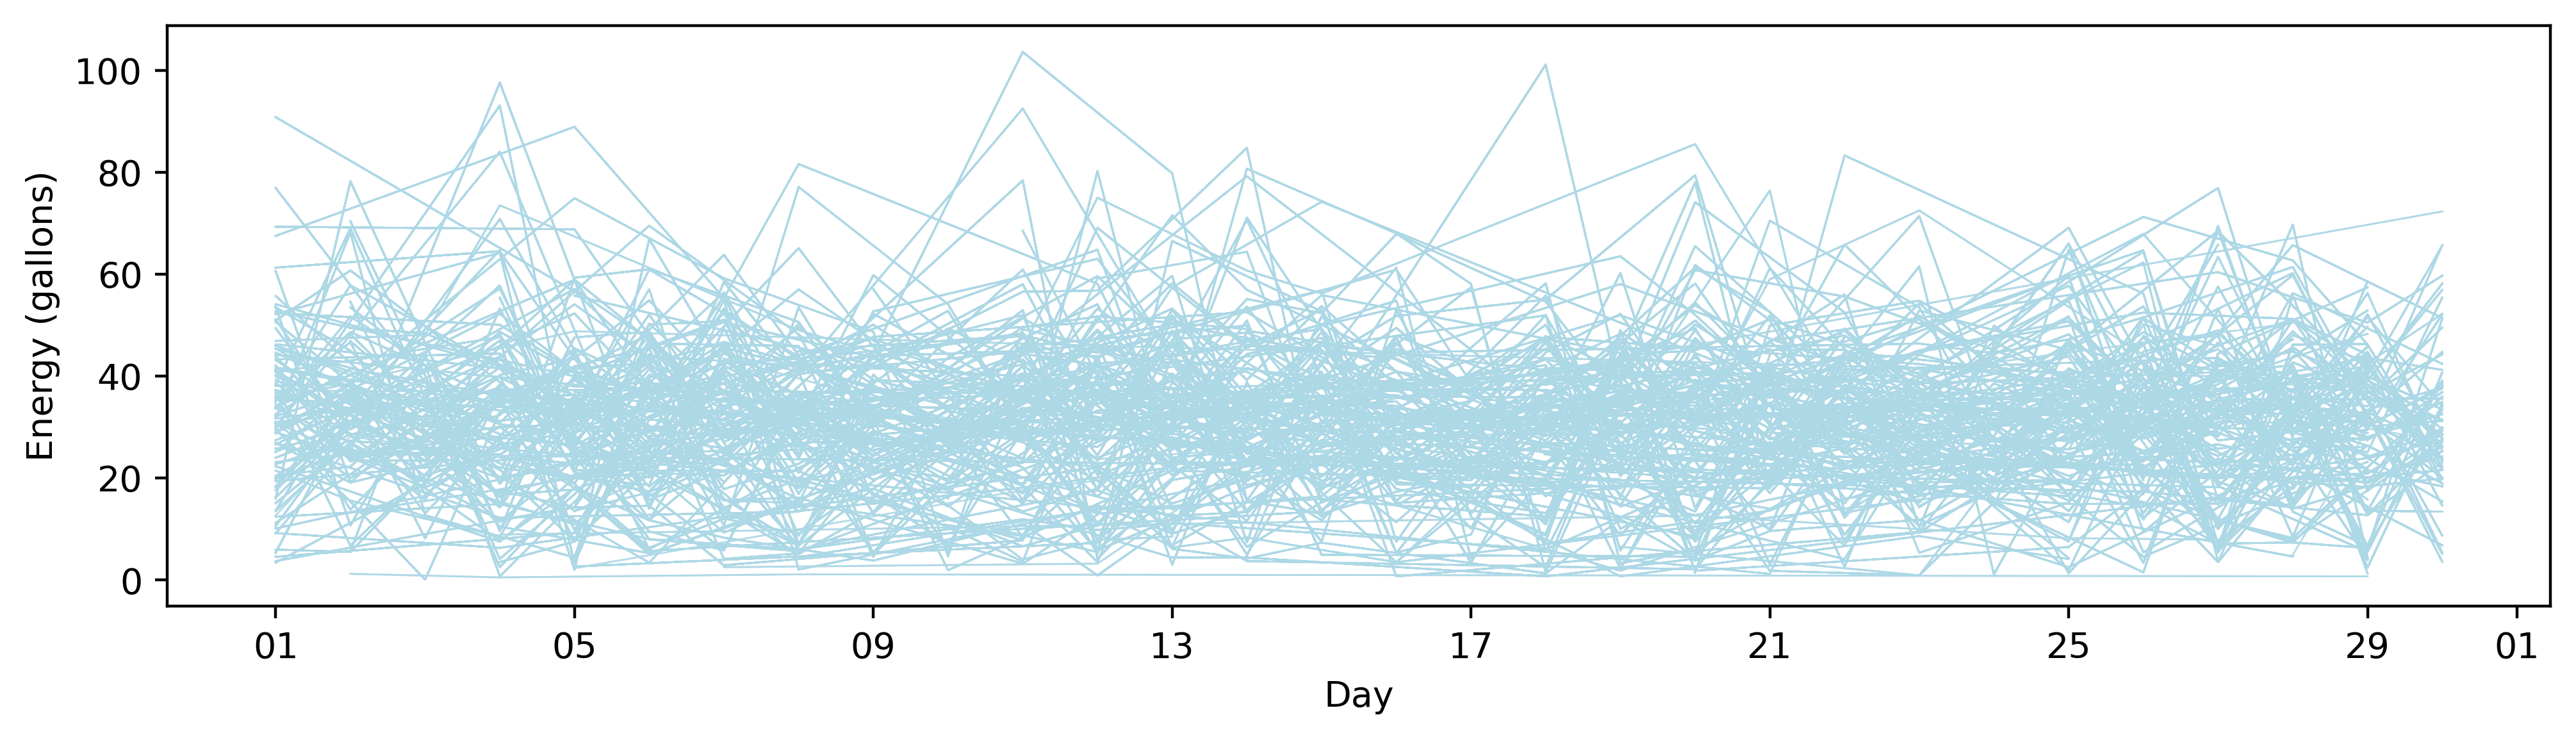

In [57]:
# set size
fig, ax = plt.subplots(figsize=(12, 3), dpi=400)

#figure(figsize=(11, 3), dpi=600)

# Plot
for v in vehicles:
    plot_df=df_validation_diesel[df_validation_diesel['equipment_id']==v]
    plt.plot(plot_df["gallons"], marker='', color='lightblue', linewidth=0.5, alpha=0.5)


date_form = DateFormatter('%d')
ax.xaxis.set_major_formatter(date_form)

# Labelling 
plt.ylabel("Energy (gallons)", fontsize=10)
plt.xlabel("Day", fontsize=10)


#red_patch = mpatches.Patch(color='red', label='Colored based on bus ID')
#plt.legend(handles=[red_patch])
#plt.grid()

# Saving
plt.savefig(r'../../figures/fuel-consumption.png', dpi=400, bbox_inches='tight')

# Display
plt.show()

In [52]:
#print(df_diesel[['gallons']].groupby(['date','equipment_id']).mean())
df=df_diesel.groupby(['date','equipment_id']).mean().reset_index()

In [54]:
df.gallons.mean()

29.884086639475832

In [55]:
df.gallons.median()

30.4